In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"], dtype=int)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"], dtype=int)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1


In [8]:
# import libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [9]:
# selecting relevent variables in our dataset in order to set X and y values
X = titanic_df.iloc[:,[2,4,5,6,8,9,10,11,12]].values
y = titanic_df.iloc[:,1].values

In [14]:
# train our model
X = X.reshape(-1, 9)
X = preprocessing.scale(X) # scale the data so that it is easier to fit

# split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=42)

# split the training set further into training and developemental sets
X_train, X_dev, y_train, y_dev = train_test_split(X, 
                y, test_size=0.25, random_state=42)

In [13]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)
unpruned.fit(X_train, y_train)

Performance without pruning: 0.726457399103139
At depth: 18


In [42]:
# Configure our feature names 
feat = titanic_df.keys()
index_feat = [2,4,5,6,8,9,10,11,12]
used_feat = []
for i in range(0, len(index_feat)):
    used_feat.append(feat[index_feat[i]])

['Pclass']
['Pclass', 'Age']
['Pclass', 'Age', 'SibSp']
['Pclass', 'Age', 'SibSp', 'Parch']
['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female']
['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male']
['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C']
['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q']
['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


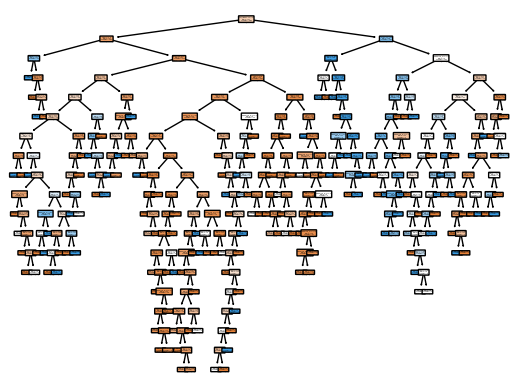

In [44]:
# plot our decision tree
fig = plt.figure()
tree.plot_tree(unpruned,feature_names = used_feat, 
                     rounded = True, proportion = False, precision = 2, filled = True) 
# display tree
fig.savefig('unpruned_tree.png')

In [45]:
# computation of models accuracy
print("Performance on developemental data without pruning:", unpruned.score(X_dev, y_dev))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.726457399103139
At depth: 18


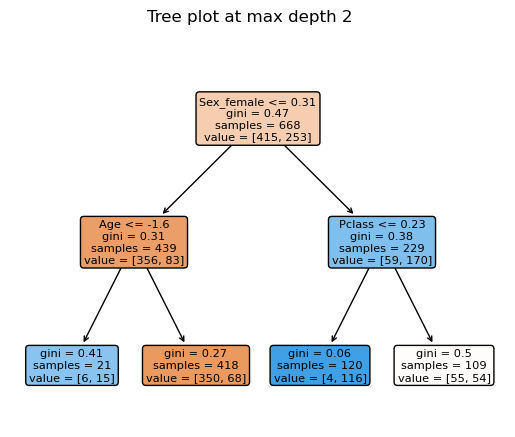

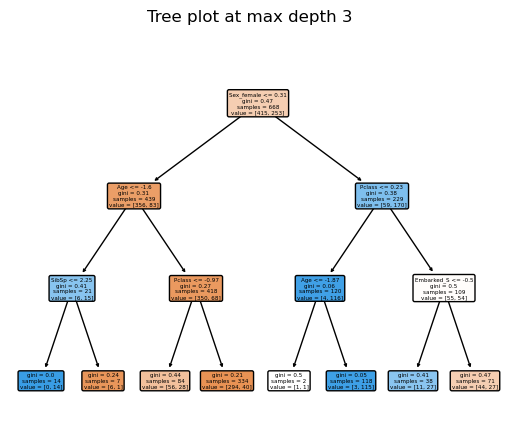

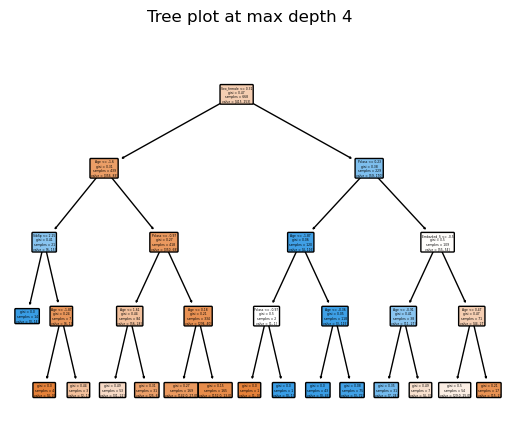

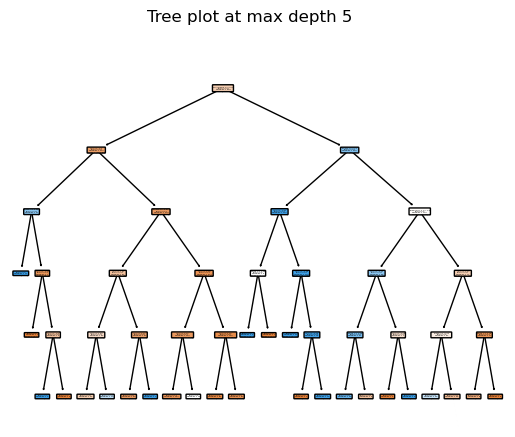

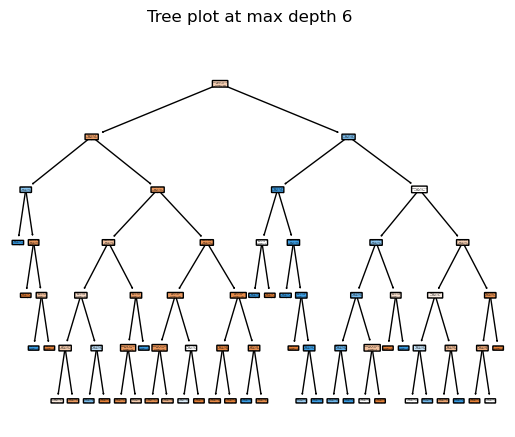

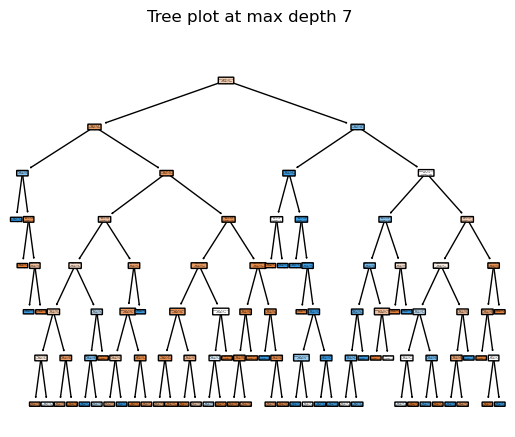

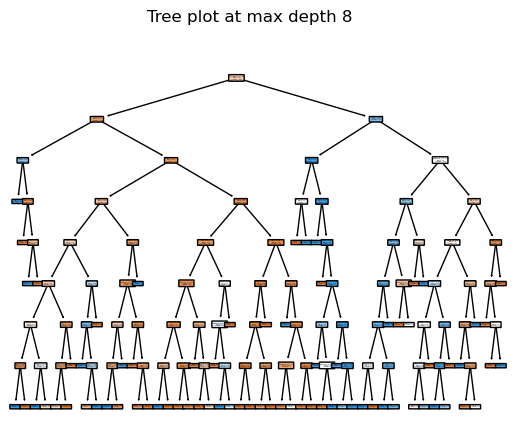

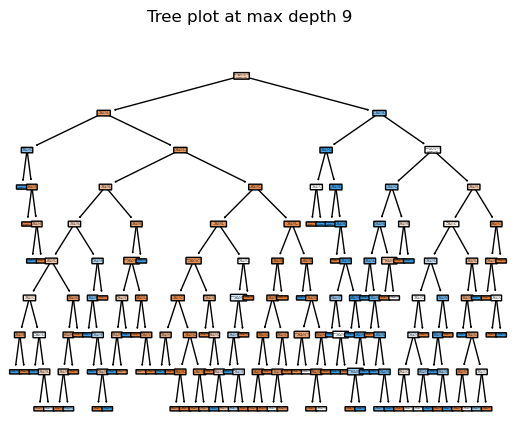

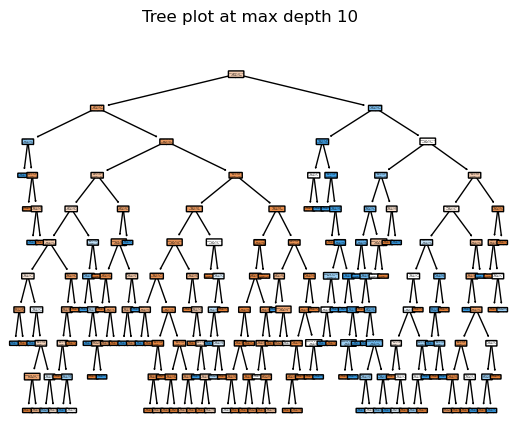

In [56]:
# Looking at our decision tree at different depths with the developemental data.
max_depths = np.arange(2,11)
dev_scores = []
train_scores = []
for i in max_depths:
    # create and train our model at the max depth i
    pruned = DecisionTreeClassifier(max_depth=i, random_state=42)
    pruned.fit(X_train, y_train)

    # plot our plot
    fig = plt.figure()
    plt.suptitle(f"Tree plot at max depth {str(i)}")
    tree.plot_tree(pruned,feature_names = used_feat, 
                     rounded = True, proportion = False, precision = 2, filled = True) 
    
    # compute and store our accuracy scores for both the training and the developement
    # data
    dev_score = pruned.score(X_dev, y_dev)
    dev_scores.append(dev_score)
    train_score = pruned.score(X_train, y_train)
    train_scores.append(train_score)

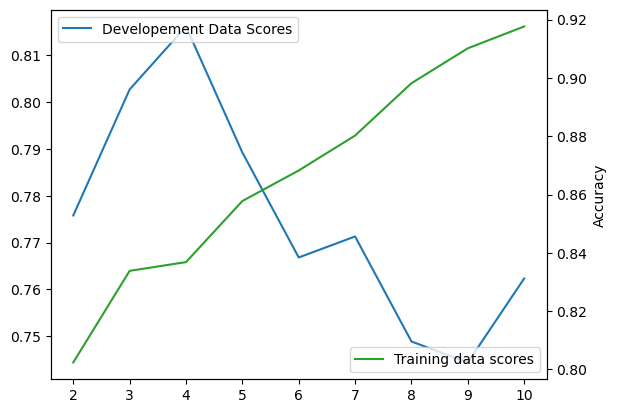

In [60]:
# Plot of the training and developemental accuracies
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(max_depths, train_scores, color="C2", label="Training data scores")
ax.plot(max_depths, dev_scores, label="Developement Data Scores")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(max_depths)
ax.legend(loc=2)
ax2.legend(loc=4)
plt.show()

From this graph we can clearly see that the deeper a tree goes in its depths 
the model simply begins to map out the training data this is good for the accuracy of our 
our model in terms of its performance on the training data. However after the depth of 4 
the performance of the model on the developemental data begins to take a sharp decrease 
due to the overfitting of the training data. So the ideal depth for this tree is 4.

In [65]:
# Test the accuracy of our model on the test data
pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
pruned.fit(X_train, y_train)
print("Performance on the test data with pruning:", pruned.score(X_test, y_test))

Performance on the test data with pruning: 0.8161434977578476


At 81.61% this model has quite a satisfactory performance on the test data.